## PCA Examples

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd


## Face Detection

An example from the Python Data Science Handbook

In [49]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=10)
print(faces.target_names)
print(faces.images.shape)

['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Andy Roddick' 'Ann Veneman' 'Ari Fleischer' 'Ariel Sharon'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Bill McBride' 'Bill Simon'
 'Colin Powell' 'Condoleezza Rice' 'David Beckham' 'David Nalbandian'
 'Dick Cheney' 'Donald Rumsfeld' 'Edmund Stoiber' 'Fidel Castro'
 'George HW Bush' 'George Robertson' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Gordon Brown' 'Hamid Karzai' 'Hans Blix'
 'Harrison Ford' 'Hillary Clinton' 'Hu Jintao' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jackie Chan' 'Jacques Chirac' 'James Kelly' 'Jean Chretien'
 'Jeb Bush' 'Jennifer Aniston' 'Jennifer Capriati' 'John Ashcroft'
 'John Bolton' 'John Howard' 'Joschka Fischer' 'Juan Carlos Ferrero'
 'Julianne Moore' 'Junichiro Koizumi' 'Kofi Annan' 'Lance Armstrong'
 'Laura Bush' 'Lindsay Davenport' 'Lleyton Hewitt' 'Megawati Sukarnoputri'
 'Michael Bloomberg' 'Michael Schumacher' 'Mohammad Khatami'
 'Nicole Kidman' 'Pervez Musharraf' 

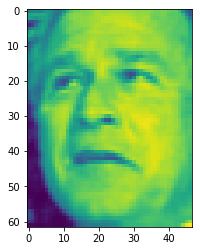

In [64]:
plt.imshow(faces.images[101])

How can we break these faces down to their most basic components?

In [69]:
faces.data.shape

(3032, 2914)

So we have 3k rows, and a bunch of columns for the pixels.

In [71]:
pca_model = PCA(150)

In [73]:
pca_model = pca_model.fit(faces.data)

Text(0.5, 1.0, 'Portion of Variance Explained')

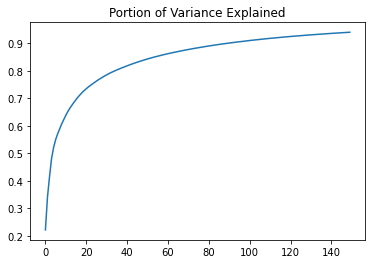

In [78]:
plt.plot(list(range(150)),pca_model.explained_variance_ratio_.cumsum())
plt.title("Portion of Variance Explained")

__How does this inform us about choice of K?__

Text(0.5, 1.0, 'Eigenvalues by Component')

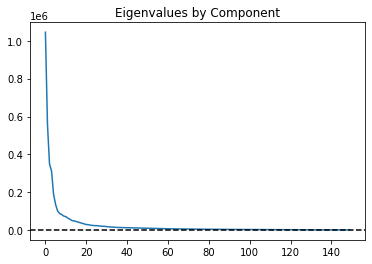

In [82]:
plt.plot(list(range(150)),pca_model.explained_variance_)
plt.axhline(1,ls="--",color="black")
plt.title("Eigenvalues by Component")


__What does this tell us?__

In the case of images, the PCA components can actually be visualized:

In [85]:
pca_model.components_[0]

array([-0.00730544, -0.00795047, -0.0090066 , ..., -0.00662993,
       -0.00524152, -0.00396034], dtype=float32)

These are the coordinates for the plane going through the data. Since each column is a pixel value, we can reconstruct into an image.

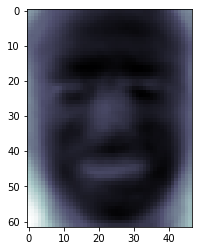

In [91]:
plt.imshow(pca_model.components_[0].reshape(62,47),cmap="bone")

__Why does it look like this you wonder?__

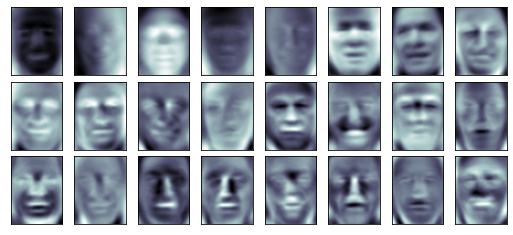

In [84]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_model.components_[i].reshape(62, 47), cmap='bone')

What are these? The are referred to as __"eigenfaces"__

Let's try reconstructing the data

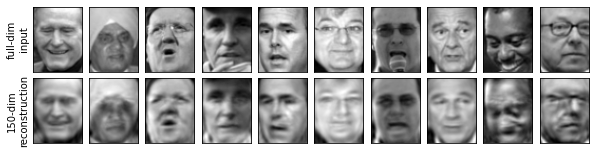

In [92]:
components = pca_model.transform(faces.data)
projected = pca_model.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');



So just from 150 components we can make a fairly accurate representation of the faces!

### Making an Asset Index

Here we will demonstrate making an asset index using an Ethiopia LSMS survery round from 2011. The Living Standard Management Survey (LSMS) is a World Bank used for collecting household-level data.

In [4]:
df = pd.read_csv("../../Data/Analysis/ETH_2011_ERSS_v02_M_CSV/ETH_2011_ERSS_v02_M_CSV/sect10_hh_w1.csv")

df

,household_id,ea_id,rural,pw,saq01,saq02,saq03,saq04,saq05,saq06,saq07,saq08,hh_s10q00,hh_s10q0a,hh_s10q01,hh_s10q02_a,hh_s10q02_b
0,1010101601002,1010101601,1,2236.134521,1,1,1,8,88,16,1,2,1,Kerosene stove,2.0,1.0,2.0
1,1010101601002,1010101601,1,2236.134521,1,1,1,8,88,16,1,2,2,Butance Gas stove,0.0,NaN,NaN
2,1010101601002,1010101601,1,2236.134521,1,1,1,8,88,16,1,2,3,Electric stove,0.0,NaN,NaN
3,1010101601002,1010101601,1,2236.134521,1,1,1,8,88,16,1,2,4,Blanket/Gabi,0.0,NaN,NaN
4,1010101601002,1010101601,1,2236.134521,1,1,1,8,88,16,1,2,5,Mattress and/or bed,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138910,15010203102121,15010203102,1,202.670288,15,1,2,8,88,31,2,121,31,Axe (Gejera,0.0,NaN,NaN
138911,15010203102121,15010203102,1,202.670288,15,1,2,8,88,31,2,121,32,Pick Axe (Geso),0.0,NaN,NaN
138912,15010203102121,15010203102,1,202.670288,15,1,2,8,88,31,2,121,33,Plough (Traditional),0.0,NaN,NaN
138913,15010203102121,15010203102,1,202.670288,15,1,2,8,88,31,2,121,34,Plough (Modern),0.0,NaN,NaN


Data is in long format. Here I will convert to "wide"

In [5]:
assets = df.set_index(['household_id',"ea_id","hh_s10q0a"])["hh_s10q01"]

assets = assets.unstack()

(assets!=0).mean()*100

hh_s10q0a
Axe (Gejera                      41.269841
Bicycle                           2.947846
Biogas stove (pit)                1.108592
Blanket/Gabi                     84.580499
Butance Gas stove                 1.839254
CD/VCD/DVD/Video Deck             4.635928
Cart (Animal Drawn                2.242378
Cart (Hand pushed)                2.544722
Electric stove                    1.184177
Fixed line telephone              3.602923
Jewels (Gold and Silver)         24.640967
Kerosene stove                    6.752331
Mattress and/or bed              60.670194
Mitad - electric                  1.335349
Mitad - power saving (modern)     6.626354
Mobile Telephone                 29.251701
Mofer and Kember                 50.793651
Motorcycle                        1.360544
Pick Axe (Geso)                  41.496599
Plough (Modern)                   2.695893
Plough (Traditional)             53.439153
Private car                       1.133787
Radio                            33.912824
R

To make this "asset index" we can apply PCA to this long list of household assets.

#### Very Important: Always standardize data before using PCA.

In [13]:
assets_std = (assets - assets.mean())/assets.std()


Let's try fitting a model with 3 components.

In [15]:
pca_model = PCA(n_components=3)

pca_model = pca_model.fit(assets_std.fillna(0))

pca_model.transform(assets_std.fillna(0))

array([[ 1.02087442,  2.27136346,  2.09045043],
       [-0.99696621,  0.08837396,  1.57002892],
       [-0.59263516, -1.70429264, -0.41180724],
       ...,
       [-0.55353906, -1.57044526, -0.74297098],
       [-1.06501862, -1.8987376 , -0.28667106],
       [-1.06501862, -1.8987376 , -0.28667106]])

So now we have created a 3-d coordinate system out of the severa asset variables we have.

How are these components related to our asset measurements?

In [16]:
pca_model.explained_variance_ratio_

array([0.34687576, 0.07889105, 0.06602762])

So the first component explains 34% while the next two explain about 8 to 7%. Let's try more components:

In [26]:
K = 20
pca_model = PCA(n_components=K)
pca_model = pca_model.fit(assets_std.fillna(0))

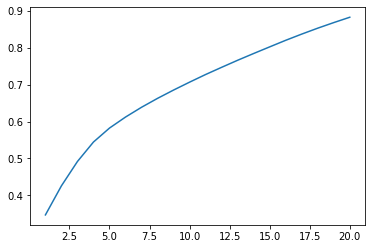

In [27]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,K+1)),pca_model.explained_variance_ratio_.cumsum())

__What does this rule seem to say?__

Let's look at the eigenvalue rule:

In [32]:
pca_model.explained_variance_

array([12.14038922,  2.76112709,  2.31091697,  1.84605458,  1.3239103 ,
        1.04466685,  0.92961817,  0.84578817,  0.7882267 ,  0.74969428,
        0.72469989,  0.68301602,  0.66991339,  0.64175174,  0.62900725,
        0.62331893,  0.58894168,  0.5624387 ,  0.52954016,  0.50733511])

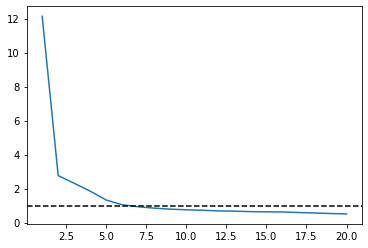

In [33]:
plt.plot(list(range(1,K+1)),pca_model.explained_variance_)
plt.axhline(1,ls="--",color='black')

__So this rule seems to point to what?__

In [34]:
K = 6
pca_model = PCA(n_components=K)
pca_model = pca_model.fit(assets_std.fillna(0))

Now let's look at how it correlates with the variables.

In [38]:
load_scores = pd.DataFrame(pca_model.components_)
load_scores

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.025774,0.219597,0.225090,0.029967,0.197703,0.230394,0.228354,0.224661,0.208746,0.197394,...,0.231250,0.146718,-0.002959,0.183581,0.219671,0.166052,0.159982,0.183652,0.110318,0.088104
1,0.155179,-0.052252,-0.065140,0.398184,-0.063728,0.013287,-0.080652,-0.073669,-0.065716,-0.009953,...,-0.076980,0.130572,0.366079,-0.036669,0.034632,0.035665,-0.028619,-0.015821,-0.047234,0.218732
2,0.106210,-0.048438,0.208738,-0.120887,0.043664,-0.198648,0.010346,-0.016763,0.071502,-0.095129,...,0.011202,-0.075750,0.296066,-0.067410,-0.245188,0.098422,0.136333,0.187234,0.146287,-0.157096
3,0.076413,0.217996,-0.186490,-0.087077,-0.001796,0.122457,0.259253,0.223799,-0.005978,0.120006,...,0.243500,-0.264478,0.176766,0.149623,0.089741,-0.226140,-0.114389,-0.176354,-0.167440,0.005707
4,0.600823,0.000913,0.031992,-0.209356,-0.026153,-0.062323,-0.026206,0.000672,-0.050511,-0.041836,...,-0.038597,-0.039616,-0.171059,-0.045415,-0.052005,0.040028,0.122969,0.035840,-0.007601,0.209093
5,-0.037304,-0.009445,-0.058528,0.007466,-0.105809,0.049555,-0.003407,-0.020349,-0.113922,0.065818,...,-0.010231,-0.061580,0.194110,0.033522,0.040398,-0.115001,0.366241,-0.046509,-0.096254,-0.038884


In [42]:
load_scores.columns = assets.columns

In [44]:
load_scores.T

,0,1,2,3,4,5
hh_s10q0a,,,,,,
Axe (Gejera,0.025774,0.155179,0.106210,0.076413,0.600823,-0.037304
Bicycle,0.219597,-0.052252,-0.048438,0.217996,0.000913,-0.009445
Biogas stove (pit),0.225090,-0.065140,0.208738,-0.186490,0.031992,-0.058528
Blanket/Gabi,0.029967,0.398184,-0.120887,-0.087077,-0.209356,0.007466
Butance Gas stove,0.197703,-0.063728,0.043664,-0.001796,-0.026153,-0.105809
CD/VCD/DVD/Video Deck,0.230394,0.013287,-0.198648,0.122457,-0.062323,0.049555
Cart (Animal Drawn,0.228354,-0.080652,0.010346,0.259253,-0.026206,-0.003407
Cart (Hand pushed),0.224661,-0.073669,-0.016763,0.223799,0.000672,-0.020349
Electric stove,0.208746,-0.065716,0.071502,-0.005978,-0.050511,-0.113922


So how might we try and interpret these components?

Here is a class I wrote to interace with the model easier.

In [46]:
class PCA_Model:
    def __init__(self,ncomps,data,cols):
        
        self.ncomps = ncomps
        self.cols = cols
        self.data = data
        self.scaled_data = StandardScaler().fit_transform(data[cols].values)
        
    def fit(self):
        self.PCA_obj = PCA(self.ncomps).fit(self.scaled_data)
    
    def describe(self):
        explvar_ = self.PCA_obj.explained_variance_ratio_

        explvar = pd.DataFrame(explvar_[np.newaxis,:]*100,\
                               columns=["Component " + str(x) for x in range(self.ncomps)],\
                               index=["% Explained Variance"])
        
        loadscores_ = self.PCA_obj.components_
        loadscores = pd.DataFrame(loadscores_,\
                                  columns=self.cols,\
                                  index=["Component " + str(x) for x in range(self.ncomps)])
        print("Explains {0:0.2f}% of the variance".format(round(sum(explvar_),2)*100))
        print(explvar)
        print(loadscores)
        return explvar,loadscores
    
    def gen_data(self):
        return self.PCA_obj.transform(self.scaled_data)
    
    def graph(self,alpha=.6):
        self.graphdata = pd.concat([self.data[[color]].reset_index(drop=True),\
                                    pd.DataFrame(self.gen_data()).reset_index(drop=True)],axis=1)
        if self.ncomps==2:
            return self.graphdata.plot(kind="scatter",x=0,y=1,\
                                       c=color,alpha=alpha,colormap=cm)
        else:
            ax = plt.axes(projection='3d')
            ax.scatter3D(self.graphdata[0], \
                         self.graphdata[1], \
                         self.graphdata[2])#, \
                         #c=color,colormap=cm)
    

In [47]:
pca4 = PCA_Model(3,assets.fillna(0),assets.columns)
pca4.fit()
var,load_scores = pca4.describe();

Explains 49.00% of the variance
                      Component 0  Component 1  Component 2
% Explained Variance    34.686671      7.89023     6.602063
hh_s10q0a    Axe (Gejera   Bicycle  Biogas stove (pit)  Blanket/Gabi  \
Component 0     0.025776  0.219593            0.225092      0.029982   
Component 1     0.155265 -0.052347           -0.065102      0.398429   
Component 2     0.106182 -0.048356            0.208759     -0.120623   

hh_s10q0a    Butance Gas stove  CD/VCD/DVD/Video Deck  Cart (Animal Drawn  \
Component 0           0.197701               0.230391            0.228356   
Component 1          -0.063898               0.013168           -0.080612   
Component 2           0.043940              -0.198809            0.010373   

hh_s10q0a    Cart (Hand pushed)  Electric stove  Fixed line telephone  ...  \
Component 0            0.224663        0.208747              0.197396  ...   
Component 1           -0.073639       -0.065652             -0.009823  ...   
Component 2     